# Bayesian Cosmology

We will attempt to explore a simple cosmological model for the evolution of the universe using some real-world supernova data. This topic is very deep and you can spend an entire degree in physics learning that goes into cosmology, but we will try and highlight some of the basics and provide links for further reading.  

The cosmology we are going to investigate is a *matter dominated* universe, which only has two free parameters: 
* $\Omega_{\Lambda}$, also known as dark energy or the [cosmological constant](https://en.wikipedia.org/wiki/Cosmological_constant);
*  $\Omega_M$, also known as [dark matter](https://en.wikipedia.org/wiki/Dark_matter).

remove this V.
There is also the condition that the [universe is flat](https://en.wikipedia.org/wiki/Shape_of_the_universe), which essentially just forces the additional constraint at the end that $\Omega_{\Lambda} + \Omega_M = 1$.

For those further interested in the physics, this is the starting point for the [Lambda-CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model). However, we are just going to assume the physicists know what they are doing, and try to calculate posterior distributions over the 2 model parameters using bayesian inference.


# Friedmann Equations


The [Friedmann Equations](https://en.wikipedia.org/wiki/Friedmann_equations) are a set of equations which govern how the expansion of the universe evolves. The Friedmann equation for a flat lambda universe, and therefore of focus to us is
$$
\frac{H^2}{H_0^2} = \Omega_M (1 + z)^3 + (1 - \Omega_{\Lambda} - \Omega_M) (1 + z)^2 + \Omega_{\Lambda}.
$$
$H$ is known as the [Hubble factor](https://en.wikipedia.org/wiki/Hubble%27s_law) and quantifies how quickly the universe is expanding, and $H_0$ is the [value today](https://en.wikipedia.org/wiki/Hubble%27s_law#21st_century_measurements). $z$ is the [redshift](), which states how much light gets distorted as it travels through the universe to reach us from far away stars. 

Using the Friedmann equation and a bit of nobel-prize winning physics, we can relate the apparent brightness of [supernova]() explosions to their measured redshift. See [Perlmutter97](https://arxiv.org/pdf/astro-ph/9608192.pdf), [Perlmutter99](https://arxiv.org/pdf/astro-ph/9812133.pdf). 
$$
m(z) = \mathcal{M} + 5 \log_{10} d_L (z ; \Omega_{\Lambda}, \Omega_M)
$$

Where $\mathcal{M} = -3.48$ is the 'zero point' magnitude constant. The cosmological parametrisation lies in the luminosity distance, $d_L$, given by 
$$
d_L (z ; \Omega_{\Lambda}, \Omega_M) = \frac{c(1+z)}{\sqrt{|\kappa|}} \mathcal{S} \left ( \sqrt{|\kappa|} \int_0^z [(1+z')^2(1+\Omega_M z') - z'(2+z')\Omega_{\Lambda}]^{-\frac{1}{2}} dz' \right)
$$
where $c = 299,792 \text{km/s}$ is the speed of light and
$$
\kappa = 
\begin{cases}
1, &\Omega_{\Lambda} + \Omega_M = 1 \\
1 - \Omega_{\Lambda} - \Omega_M, &\text{otherwise}
\end{cases}
$$
$$
\mathcal{S}(x) = 
\begin{cases}
\sin(x), &\Omega_{\Lambda} + \Omega_M > 1 \\
x, &\Omega_{\Lambda} + \Omega_M = 1\\
\sinh(x), &\Omega_{\Lambda} + \Omega_M < 1
\end{cases}
$$
Now these expressions looks very complicated at first glance, and they are. We dont fully understand them either. However, one of the skills that is very important in quant finance is the ability to implement a model that you might not have time or expertise to fully understand. It is important to be able to abstract away the meaning behind equations and continue from there in a pragmatic workplace. 

The above expressions are really just some basic math functions, a piecewise function, and an integral. Implementing this in python shouldn't be too difficult.

# Likelihood Function

Now we have an expression for $m(z ; \Omega_{\Lambda}, \Omega_M)$ we can use the dataset from [Knop03](https://arxiv.org/pdf/astro-ph/0309368.pdf) that we have provided in `supernova_data.csv` along with a likelihood function to run a Bayesian analysis. 

The idea is to assume a value for $(\Omega_{\Lambda}, \Omega_M)$ and then calculate the $\chi^2$ of the fit $m(z)$ with our data $D$. The larger the $\chi^2$, the worse the fit is and therefore the lower the likelihood. We can express this by treating the $\chi^2$ value as a boltzmann factor and say our likelihood is proportional to
$$
\mathcal{L}(\Omega_{\Lambda}, \Omega_M) = e^{-\chi^{2} (D; \Omega_{\Lambda}, \Omega_M)}
$$

Need to clarify $\chi^2$ is sum of residuals

Now you have all the maths required to run a 2-dimensional Bayesian inference on a simple cosmological model. You should be able to calculate and plot a posterior distribution which shows the most likely values for our universes dark matter and dark energy densities.

Something like this
[image]


In [8]:
data = '''1997ek 0.863 23.32 24.51 ± 0.03 24.59 ± 0.19 24.95 ± 0.44 1.056 ± 0.058 0.838 ± 0.054 0.042 −0.091 ± 0.075
1997eq 0.538 22.63 23.21 ± 0.02 23.15 ± 0.18 23.02 ± 0.17 0.960 ± 0.027 0.202 ± 0.030 0.044 0.035 ± 0.034
1997ez 0.778 23.17 24.29 ± 0.03 24.41 ± 0.18 24.00 ± 0.42 1.078 ± 0.030 0.701 ± 0.048 0.026 0.095 ± 0.068
1998as 0.355 22.18 22.72 ± 0.03 22.66 ± 0.17 22.02 ± 0.15 0.956 ± 0.012 0.226 ± 0.027 0.037 0.158 ± 0.030 2,3
1998aw 0.440 22.56 23.22 ± 0.02 23.26 ± 0.17 — 1.026 ± 0.019 0.300 ± 0.024 0.026 0.259 ± 0.026 1–3
1998ax 0.497 22.63 23.25 ± 0.05 23.47 ± 0.17 22.96 ± 0.20 1.150 ± 0.032 0.212 ± 0.041 0.035 0.113 ± 0.044 2,3
1998ay 0.638 23.26 23.86 ± 0.08 23.92 ± 0.19 23.85 ± 0.33 1.040 ± 0.041 0.339 ± 0.067 0.035 0.015 ± 0.084 3
1998ba 0.430 22.34 22.97 ± 0.05 22.90 ± 0.18 22.75 ± 0.18 0.954 ± 0.020 0.094 ± 0.036 0.024 0.040 ± 0.038
1998be 0.644 23.33 23.91 ± 0.04 23.64 ± 0.18 23.26 ± 0.27 0.816 ± 0.028 0.436 ± 0.051 0.029 0.106 ± 0.065 3
1998bi 0.740 22.86 23.92 ± 0.02 23.85 ± 0.17 23.75 ± 0.37 0.950 ± 0.027 0.552 ± 0.037 0.026 0.026 ± 0.050
2000fr 0.543 22.44 23.07 ± 0.02 23.16 ± 0.17 23.27 ± 0.14 1.064 ± 0.011 0.135 ± 0.022 0.030 −0.031 ± 0.025
1995ar 0.465 22.80 23.48 ± 0.08 23.35 ± 0.22 21.54 ± 0.97 0.909 ± 0.104 0.509 ± 0.222 0.022 0.448 ± 0.242
1995as 0.498 23.03 23.69 ± 0.07 23.74 ± 0.23 23.52 ± 0.87 1.035 ± 0.090 0.155 ± 0.197 0.021 0.051 ± 0.212 3
1995aw 0.400 21.78 22.28 ± 0.03 22.57 ± 0.18 23.17 ± 0.45 1.194 ± 0.037 −0.127 ± 0.103 0.040 −0.160 ± 0.107
1995ax 0.615 22.56 23.21 ± 0.06 23.38 ± 0.22 23.98 ± 1.02 1.112 ± 0.073 0.152 ± 0.204 0.033 −0.153 ± 0.249
1995ay 0.480 22.64 23.07 ± 0.04 22.90 ± 0.19 22.74 ± 0.70 0.880 ± 0.064 0.209 ± 0.158 0.114 0.047 ± 0.170
1995az 0.450 22.46 22.70 ± 0.07 22.66 ± 0.20 23.04 ± 0.58 0.973 ± 0.064 0.087 ± 0.135 0.181 −0.089 ± 0.144
1995ba 0.388 22.07 22.64 ± 0.06 22.60 ± 0.18 22.74 ± 0.45 0.971 ± 0.047 0.006 ± 0.105 0.018 −0.033 ± 0.110
1996cf 0.570 22.71 23.31 ± 0.03 23.30 ± 0.18 23.53 ± 0.45 0.996 ± 0.045 0.162 ± 0.091 0.040 −0.054 ± 0.107 3
1996cg 0.490 22.46 23.09 ± 0.03 23.11 ± 0.18 22.26 ± 0.45 1.011 ± 0.040 0.300 ± 0.099 0.035 0.205 ± 0.107 3
1996ci 0.495 22.19 22.83 ± 0.02 22.78 ± 0.18 22.92 ± 0.32 0.964 ± 0.040 0.083 ± 0.070 0.028 −0.033 ± 0.075
1996cl 0.828 23.37 24.53 ± 0.17 24.49 ± 0.46 25.92 ± 0.97 0.974 ± 0.239 0.549 ± 0.184 0.035 −0.344 ± 0.251
1996cm 0.450 22.67 23.26 ± 0.07 23.11 ± 0.18 22.63 ± 0.77 0.899 ± 0.061 0.214 ± 0.174 0.049 0.124 ± 0.185 3
1996cn 0.430 22.58 23.25 ± 0.03 23.09 ± 0.19 — 0.890 ± 0.066 0.379 ± 0.090 0.025 0.332 ± 0.097 1–3
1997F 0.580 22.93 23.51 ± 0.06 23.57 ± 0.20 23.30 ± 0.95 1.041 ± 0.066 0.275 ± 0.197 0.040 0.063 ± 0.232
1997H 0.526 22.70 23.26 ± 0.04 23.09 ± 0.19 22.51 ± 0.80 0.882 ± 0.043 0.303 ± 0.174 0.051 0.150 ± 0.194
1997I 0.172 20.18 20.34 ± 0.01 20.29 ± 0.17 20.19 ± 0.28 0.967 ± 0.009 0.065 ± 0.047 0.051 0.026 ± 0.064
1997N 0.180 20.39 20.38 ± 0.02 20.48 ± 0.17 21.28 ± 0.52 1.067 ± 0.015 −0.141 ± 0.093 0.031 −0.200 ± 0.123
1997O 0.374 22.99 23.53 ± 0.06 23.60 ± 0.18 — 1.048 ± 0.054 0.087 ± 0.152 0.029 0.049 ± 0.162 1–3
1997P 0.472 22.53 23.16 ± 0.04 22.99 ± 0.18 23.24 ± 0.91 0.888 ± 0.039 0.058 ± 0.207 0.033 −0.052 ± 0.219
1997Q 0.430 22.01 22.61 ± 0.02 22.52 ± 0.17 22.55 ± 0.62 0.935 ± 0.024 0.061 ± 0.140 0.030 −0.002 ± 0.148
1997R 0.657 23.29 23.89 ± 0.05 23.80 ± 0.19 23.68 ± 0.90 0.940 ± 0.059 0.393 ± 0.175 0.030 0.032 ± 0.222
1997ac 0.320 21.42 21.87 ± 0.02 21.96 ± 0.17 21.95 ± 0.33 1.061 ± 0.015 0.063 ± 0.065 0.027 0.001 ± 0.072
1997af 0.579 22.94 23.60 ± 0.07 23.38 ± 0.18 24.31 ± 1.09 0.850 ± 0.045 0.045 ± 0.226 0.028 −0.215 ± 0.265
1997ai 0.450 22.34 22.94 ± 0.05 22.63 ± 0.22 22.58 ± 0.59 0.788 ± 0.084 0.143 ± 0.133 0.045 0.026 ± 0.142
1997aj 0.581 22.58 23.24 ± 0.07 23.16 ± 0.18 24.05 ± 0.79 0.947 ± 0.045 0.045 ± 0.164 0.033 −0.213 ± 0.193
1997am 0.416 22.01 22.58 ± 0.08 22.63 ± 0.18 22.65 ± 0.46 1.032 ± 0.060 0.037 ± 0.113 0.036 −0.008 ± 0.119
1997ap 0.830 23.16 24.35 ± 0.07 24.38 ± 0.18 23.74 ± 0.50 1.023 ± 0.045 0.903 ± 0.082 0.026 0.155 ± 0.118
1990O 0.030 16.58 16.18 ± 0.03 16.33 ± 0.20 16.30 ± 0.17 1.106 ± 0.026 0.043 ± 0.025 0.098 0.001 ± 0.026
1990af 0.050 17.92 17.76 ± 0.01 17.39 ± 0.18 17.42 ± 0.13 0.749 ± 0.010 0.077 ± 0.011 0.035 0.011 ± 0.011
1992P 0.026 16.12 16.05 ± 0.02 16.14 ± 0.19 16.16 ± 0.16 1.061 ± 0.027 −0.045 ± 0.018 0.020 −0.008 ± 0.019
1992ae 0.075 18.59 18.42 ± 0.04 18.35 ± 0.18 18.35 ± 0.15 0.957 ± 0.018 0.098 ± 0.028 0.036 0.003 ± 0.031
1992ag 0.026 16.67 16.26 ± 0.02 16.34 ± 0.20 15.55 ± 0.16 1.053 ± 0.015 0.220 ± 0.020 0.097 0.189 ± 0.021 2,3
1992al 0.014 14.61 14.48 ± 0.01 14.42 ± 0.23 14.53 ± 0.20 0.959 ± 0.011 −0.054 ± 0.012 0.034 −0.025 ± 0.013
1992aq 0.101 19.38 19.30 ± 0.02 19.12 ± 0.17 19.24 ± 0.15 0.878 ± 0.017 0.142 ± 0.023 0.012 −0.019 ± 0.026
1992bc 0.020 15.18 15.10 ± 0.01 15.18 ± 0.20 15.36 ± 0.16 1.053 ± 0.006 −0.087± 0.009 0.022 −0.046 ± 0.009
1992bg 0.036 17.41 16.66 ± 0.04 16.66 ± 0.20 16.68 ± 0.16 1.003 ± 0.014 0.128 ± 0.025 0.181 −0.006 ± 0.026
1992bh 0.045 17.71 17.60 ± 0.02 17.64 ± 0.18 17.22 ± 0.14 1.027 ± 0.016 0.101 ± 0.018 0.022 0.100 ± 0.019
1992bl 0.043 17.37 17.31 ± 0.03 17.03 ± 0.18 17.10 ± 0.14 0.812 ± 0.012 0.017 ± 0.023 0.012 −0.002 ± 0.024
1992bo 0.018 15.89 15.78 ± 0.01 15.42 ± 0.21 15.31 ± 0.17 0.756 ± 0.005 0.048 ± 0.012 0.027 0.043 ± 0.012
1992bp 0.079 18.59 18.29 ± 0.01 18.16 ± 0.18 18.41 ± 0.13 0.906 ± 0.014 0.088 ± 0.015 0.068 −0.056 ± 0.017
1992br 0.088 19.52 19.37 ± 0.08 18.93 ± 0.20 — 0.700 ± 0.021 0.186 ± 0.047 0.027 0.030 ± 0.052 1–3
1992bs 0.063 18.26 18.20 ± 0.04 18.26 ± 0.18 18.37 ± 0.14 1.038 ± 0.016 0.011 ± 0.022 0.013 −0.031 ± 0.024
1993B 0.071 18.74 18.37 ± 0.04 18.40 ± 0.18 18.10 ± 0.15 1.021 ± 0.019 0.181 ± 0.027 0.080 0.071 ± 0.029
1993O 0.052 17.87 17.64 ± 0.01 17.53 ± 0.18 17.61 ± 0.13 0.926 ± 0.007 0.042 ± 0.012 0.053 −0.014 ± 0.012
1993ag 0.050 18.32 17.83 ± 0.02 17.73 ± 0.18 17.26 ± 0.15 0.936 ± 0.015 0.217 ± 0.020 0.111 0.120 ± 0.021 2,3
1994M 0.024 16.34 16.24 ± 0.03 16.07 ± 0.20 15.84 ± 0.16 0.882 ± 0.015 0.043 ± 0.022 0.023 0.063 ± 0.022
1994S 0.016 14.85 14.78 ± 0.02 14.83 ± 0.22 14.86 ± 0.19 1.033 ± 0.026 −0.061 ± 0.019 0.018 −0.010 ± 0.019
1995ac 0.049 17.23 17.05 ± 0.01 17.17 ± 0.18 17.17 ± 0.13 1.083 ± 0.012 0.026 ± 0.011 0.042 −0.005 ± 0.011
1995bd 0.016 17.34 15.32 ± 0.01 15.37 ± 0.30 — 1.039 ± 0.008 0.735 ± 0.008 0.490 0.348 ± 0.009 1–3
1996C 0.030 16.62 16.57 ± 0.04 16.74 ± 0.19 16.50 ± 0.16 1.120 ± 0.020 0.012 ± 0.026 0.014 0.051 ± 0.027
1996ab 0.125 19.72 19.57 ± 0.04 19.47 ± 0.19 19.82 ± 0.16 0.934 ± 0.032 0.174 ± 0.025 0.032 −0.082 ± 0.029
1996bl 0.035 17.08 16.66 ± 0.01 16.71 ± 0.19 16.55 ± 0.14 1.031 ± 0.015 0.093 ± 0.012 0.099 0.036 ± 0.012'''

In [9]:
split_data = data.split("\n")
trim_data = [line.split(" ")[:10] for line in split_data]

In [10]:
with open('supernova_data.csv', 'w') as f:
    f.write('name,z,mB\n')
    for line in trim_data:
        f.write('{},{},{}\n'.format(line[0], line[1], line[3]))

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import scipy

In [104]:
c = 299792 # speed of light (km/s)
M = -3.48  # zero point magnitude

In [34]:
def curvature(x, dt):
    if dt > 1:
        return math.sin(x)
    elif dt == 1:
        return x
    elif dt < 1:
        return math.sinh(x)


def integral_func(x):
    return ((1 + x)**2 * (1 + x*dm) - x * (2 + x) * de)**(-0.5)


def scale_factor(z, de, dm):
   # de, dm = float(de), float(dm)
    kappa = 1 - de - dm if de + dm != 1 else 1

    integrand = scipy.integrate.quad(integral_func, 0, z)[0]

    return curvature(integrand * np.sqrt(abs(kappa)), de + dm)


def luminosity_distance(z, de, dm):
    kappa = 1 - de - dm if de + dm != 1 else 1

    prefac = c * (1 + z) / (np.sqrt(np.abs(kappa)))

    l_distance = prefac * np.vectorize(scale_factor)(z, de, dm)

    return l_distance


def brightness(z, de, dm):
    return M + 5 * np.log10(luminosity_distance(z, de, dm))


def loglikelihood(data, theta):
    dm = theta[0]
    de = theta[1]

    model_mb = brightness(data['z'].values, de, dm)

    square_errors = (model_mb - data['mB'].values)**2

    return -np.sum(square_errors)


In [35]:
data = pd.read_csv('supernova_data.csv')
data.sort_values(by = ['z'], inplace=True)

n=50
de_range = np.linspace(0,2,n)
dm_range = np.linspace(0,2,n)

mesh = np.meshgrid(dm_range, de_range)

df = pd.DataFrame(columns=['dm', 'de', 'loglike'])
likelihoods = []
for de in de_range:
    for dm in dm_range:
        likelihoods.append({
            'dm': dm,
            'de': de,
            'loglike': loglikelihood(data, [dm, de])
        })
     #   print(de, dm, )

df = pd.DataFrame(likelihoods)
df['like'] = np.exp(df['loglike']/2).fillna(0)

Z = df['like'].sum()
df['norm_like'] = df['like'] / Z


/var/folders/c3/f2_gdc091pv56sm31kv43kbm0000gn/T/ipykernel_85285/3017849895.py:11: RuntimeWarning: invalid value encountered in scalar power
  return ((1 + x)**2 * (1 + x*dm) - x * (2 + x) * de)**(-0.5)
/var/folders/c3/f2_gdc091pv56sm31kv43kbm0000gn/T/ipykernel_85285/3017849895.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrand = scipy.integrate.quad(integral_func, 0, z)[0]


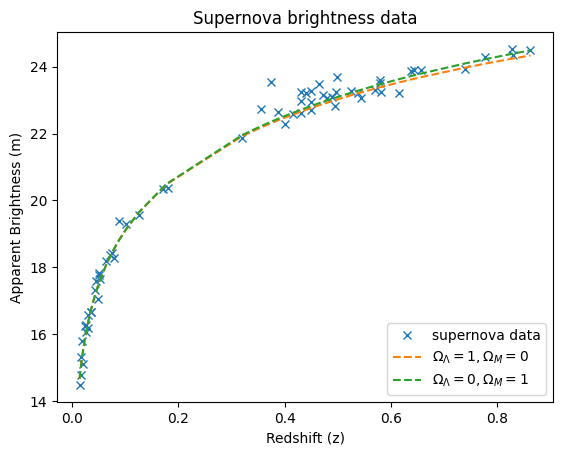

In [60]:
plt.plot(data['z'], data['mB'], marker = 'x', linestyle='', label='supernova data')
plt.plot(data['z'], brightness(data['z'], 1, 0), linestyle='--', label=r'$\Omega_{\Lambda}=1, \Omega_M=0$')
plt.plot(data['z'], brightness(data['z'], 0, 0), linestyle='--', label=r'$\Omega_{\Lambda}=0, \Omega_M=1$')
plt.xlabel('Redshift (z)')
plt.ylabel('Apparent Brightness (m)')
plt.title('Supernova brightness data')
plt.legend(loc='lower right')
plt.show()

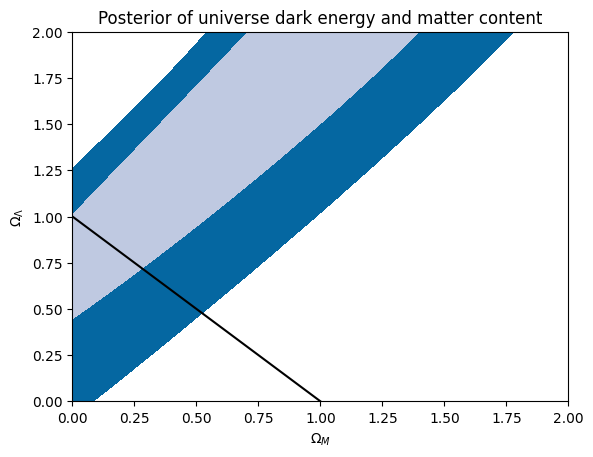

In [99]:
ax = plt.contourf(mesh[0], mesh[1], df['norm_like'].values.reshape(50,50), levels=[0.000187, 0.000907, 0.002], cmap=cm.PuBu_r)

flat_universe = np.array([np.linspace(0,1), np.linspace(1,0)])

plt.plot(flat_universe[0], flat_universe[1], color='black')
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$\Omega_{\Lambda}$')
plt.title('Posterior of universe dark energy and matter content')

plt.show()


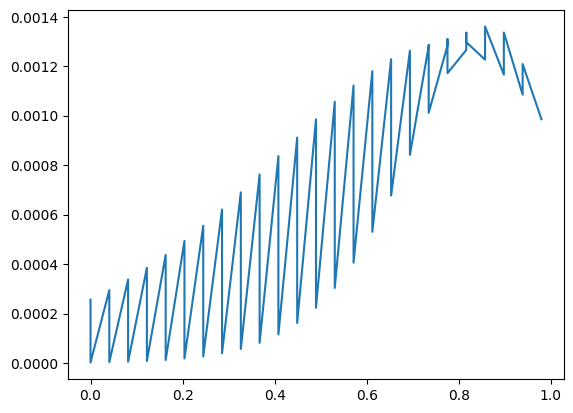

In [103]:
flat_like = df[df['de'] + df['dm'] - 1 < 1e-9]
plt.plot(flat_like['de'], flat_like['norm_like'])
plt.show()

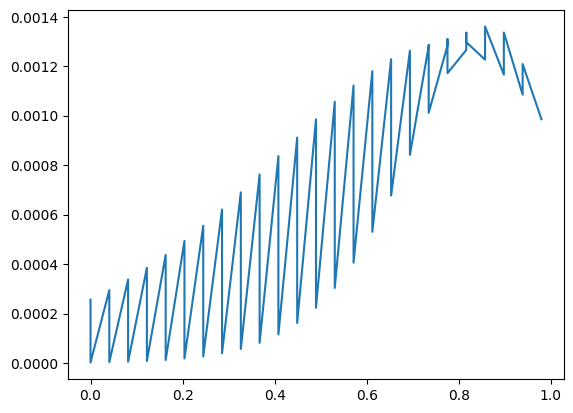